# Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import f_classif
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras import regularizers
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
import warnings 
warnings.filterwarnings("ignore")
print("Setup Complete")

Setup Complete


### First thing we should do is to see our dataset and answer some questions 

In [2]:
insurance_train_filepath = "./kaggle/train/train.csv"

# Read the file into a variable insurance_data_train
insurance_data_train = pd.read_csv(insurance_train_filepath, index_col="id")

In [3]:
insurance_test_filepath = "./kaggle/test/test.csv"

# Read the file into a variable insurance_data_train
insurance_data_test = pd.read_csv(insurance_test_filepath)

### The best start you need to do on your project is to see your dataset and the shape of it 

In [4]:
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
insurance_data_train.shape

(11504798, 11)

In [6]:
insurance_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                object 
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           object 
 6   Vehicle_Damage        object 
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ GB


### It seems that there are some features which are categorical

### Checking the missing values in this dataset 

In [7]:
missing_values = insurance_data_train.isnull().sum()
missing_values

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Good! There are no missing values

# Exploratory Data Analysis(EDA)

In [8]:
insurance_data_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

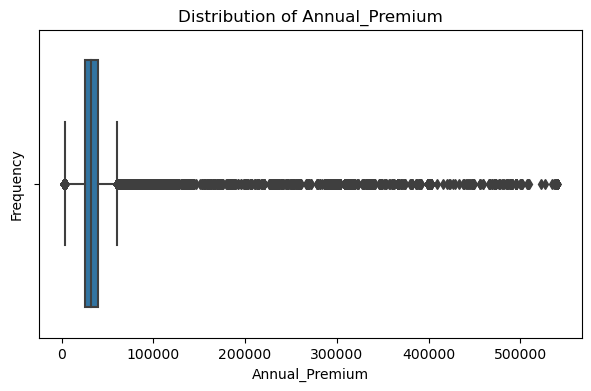

In [9]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=insurance_data_train['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

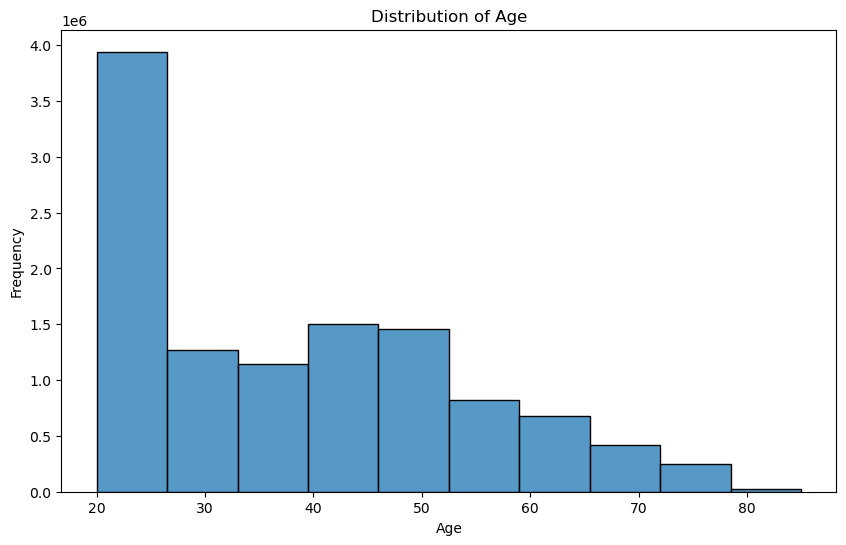

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

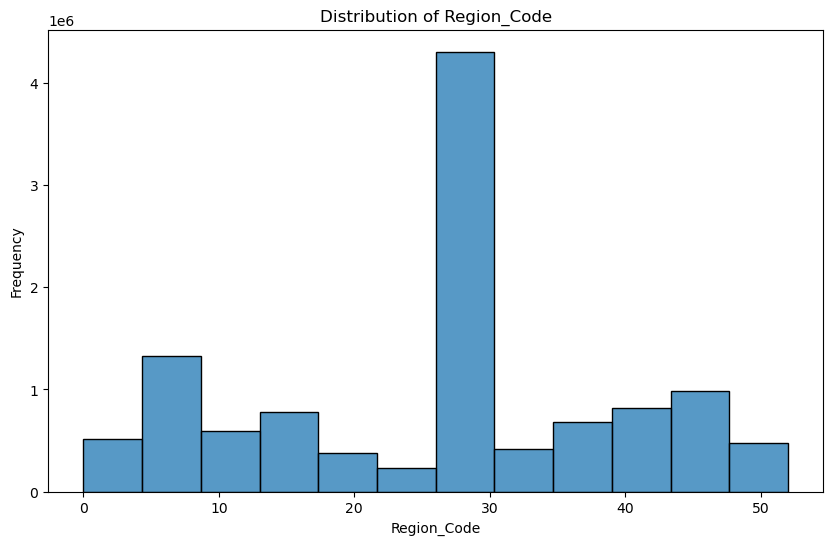

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

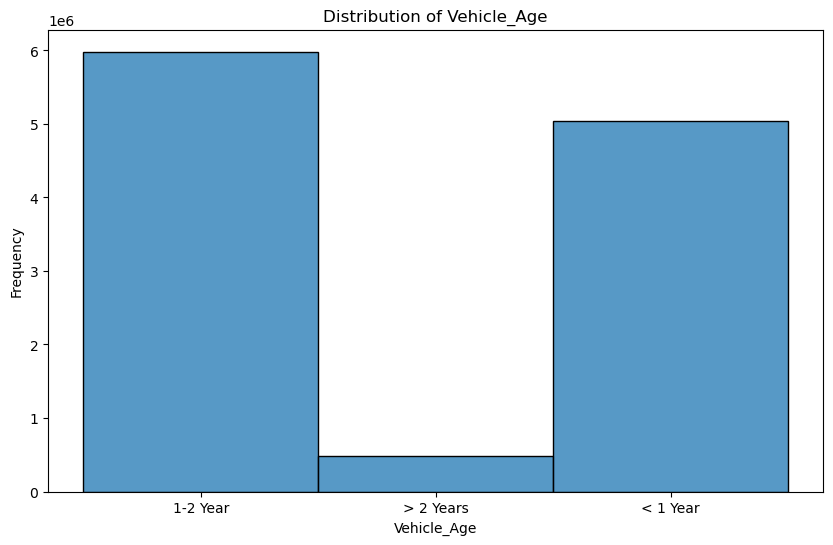

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(insurance_data_train['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Checking Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

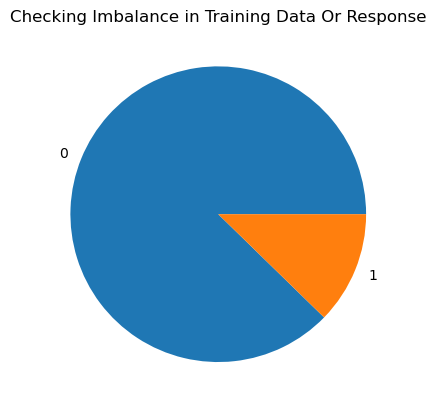

In [13]:
response_data = insurance_data_train['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')

### It seems that the data is imbalanced 

# Feature Engineering

### Handle Categorical Data

In [10]:
insurance_data_train['Vehicle_Damage']=insurance_data_train['Vehicle_Damage'].map({'Yes':1,'No':0})
insurance_data_train['Gender']=insurance_data_train['Gender'].map({'Male':1,'Female':0})
insurance_data_train['Vehicle_Age'] = insurance_data_train['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2,'> 2 Years':3})

In [11]:
insurance_data_test['Vehicle_Damage']=insurance_data_test['Vehicle_Damage'].map({'Yes':1,'No':0})
insurance_data_test['Gender']=insurance_data_test['Gender'].map({'Male':1,'Female':0})
insurance_data_test['Vehicle_Age'] = insurance_data_test['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2,'> 2 Years':3})

## Create new features from the existing ones

In [12]:
insurance_data_train['Age_Vehicle_Age'] = insurance_data_train['Age'] * insurance_data_train['Vehicle_Age']
insurance_data_train['Age_Annual_Premium'] = insurance_data_train['Age'] * insurance_data_train['Annual_Premium']
insurance_data_train['Vehicle_Damage_Annual_Premium'] = insurance_data_train['Vehicle_Damage'] * insurance_data_train['Annual_Premium']

In [13]:
insurance_data_test['Age_Vehicle_Age'] = insurance_data_test['Age'] * insurance_data_test['Vehicle_Age']
insurance_data_test['Age_Annual_Premium'] = insurance_data_test['Age'] * insurance_data_test['Annual_Premium']
insurance_data_test['Vehicle_Damage_Annual_Premium'] = insurance_data_test['Vehicle_Damage'] * insurance_data_test['Annual_Premium']

## Check For the correlation

In [14]:
insurance_data_train.corr()['Response']

Gender                           0.055212
Age                              0.122134
Driving_License                  0.009197
Region_Code                      0.012816
Previously_Insured              -0.345930
Vehicle_Age                      0.231029
Vehicle_Damage                        NaN
Annual_Premium                   0.032261
Policy_Sales_Channel            -0.152733
Vintage                         -0.015177
Response                         1.000000
Age_Vehicle_Age                  0.166647
Age_Annual_Premium               0.095020
Vehicle_Damage_Annual_Premium         NaN
Name: Response, dtype: float64

## Split the dataset

In [15]:
insurance_data_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Vehicle_Age,Age_Annual_Premium,Vehicle_Damage_Annual_Premium
id,,,,,,,,,,,,,,
0,1,21,1,35.0,0,2,NaN,65101.0,124.0,187,0,42,1367121.0,NaN
1,1,43,1,28.0,0,3,NaN,58911.0,26.0,288,1,129,2533173.0,NaN
2,0,25,1,14.0,1,1,NaN,38043.0,152.0,254,0,25,951075.0,NaN
3,0,35,1,1.0,0,2,NaN,2630.0,156.0,76,0,70,92050.0,NaN
4,0,36,1,15.0,1,2,NaN,31951.0,152.0,294,0,72,1150236.0,NaN


In [16]:
y = insurance_data_train['Response']

In [17]:
insurance_data_train.drop(['Response'], axis=1, inplace=True)

In [18]:
insurance_data_train.shape

(11504798, 13)

In [19]:
insurance_data_train.drop(['Driving_License', 'Gender'], axis=1, inplace=True)
insurance_data_test.drop(['Driving_License', 'Gender'], axis=1, inplace=True)

In [21]:
insurance_data_test.drop(['id'], axis=1, inplace=True)

In [22]:
insurance_data_train.shape, insurance_data_test.shape

((11504798, 11), (7669866, 11))

In [23]:
X = insurance_data_train.iloc[::]


#X_test = insurance_data_test[::]

In [24]:
X.shape

(11504798, 11)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.11, stratify=y, random_state=42)

# Apply  neural network model

In [23]:
X_train

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age*Annual_Premium,Region_Code*Policy_Sales_Channel,Age*Vehicle_Damage,Annual_Premium*Vehicle_Age,Annual_Premium_binned,Region_Code_freq
id,,,,,,,,,,,,,,,,
1129106,0,25,1,28.0,0,0,1,30775.0,152.0,256,769375.0,4256.0,25,0.0,2,0.299967
9554468,1,48,1,28.0,0,1,1,35693.0,124.0,11,1713264.0,3472.0,48,35693.0,2,0.299967
5397130,1,42,1,45.0,0,1,1,27863.0,124.0,172,1170246.0,5580.0,42,27863.0,1,0.013846
1915003,0,23,1,46.0,1,0,0,22345.0,152.0,130,513935.0,6992.0,0,0.0,1,0.050258
2508839,0,42,1,28.0,0,2,1,34367.0,26.0,169,1443414.0,728.0,42,68734.0,2,0.299967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837680,1,25,1,46.0,0,0,1,49355.0,152.0,242,1233875.0,6992.0,25,0.0,2,0.050258
5518931,0,48,1,28.0,0,1,1,41405.0,122.0,207,1987440.0,3416.0,48,41405.0,2,0.299967
1196686,1,51,1,21.0,0,1,1,28280.0,26.0,106,1442280.0,546.0,51,28280.0,1,0.011021


In [33]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(10239270, 11) (10239270,) (1265528, 11) (1265528,)


In [34]:
# Try to sacle the training for only neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
model = tf.keras.models.Sequential()

# Neurons, dropouts
model.add(tf.keras.layers.Dense(units=256, input_dim=X_train.shape[1] ))
#model.add(keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.001))
model.add(tf.keras.layers.Dense(units=64,  activation='relu'))
model.add(tf.keras.layers.Dropout(0.002))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.003))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.004))
#model.add(tf.keras.layers.Dense(units=32, activation='leaky_relu'))
#model.add(tf.keras.layers.Dropout(0.01))
#model.add(tf.keras.layers.Dense(units=16, activation='leaky_relu'))
#model.add(tf.keras.layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # output unit must be 1


"""model = Sequential(
    [               
        tf.keras.Input(shape=(6,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units = 256, activation='leaky_relu'),#layer-1
        Dense(units = 128, activation='leaky_relu'),#layer-2
        Dense(units = 64, activation='leaky_relu'),#layer-3
        Dense(units = 32, activation='leaky_relu'), #layer-4
        Dense(units = 1, activation='sigmoid')#output layer
        
        ### END CODE HERE ### 
    ], name = "nn_model" 
)                            
"""

'model = Sequential(\n    [               \n        tf.keras.Input(shape=(6,)),    #specify input size\n        ### START CODE HERE ### \n        Dense(units = 256, activation=\'leaky_relu\'),#layer-1\n        Dense(units = 128, activation=\'leaky_relu\'),#layer-2\n        Dense(units = 64, activation=\'leaky_relu\'),#layer-3\n        Dense(units = 32, activation=\'leaky_relu\'), #layer-4\n        Dense(units = 1, activation=\'sigmoid\')#output layer\n        \n        ### END CODE HERE ### \n    ], name = "nn_model" \n)                            \n'

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [37]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.0025),
    metrics=['accuracy'],
)

history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=3000,
    epochs=6,
    validation_data=(X_test_scaled, y_test),
    
)

Epoch 1/6
3414/3414 [==============================] - 119s 34ms/step - loss: nan - accuracy: 0.8770 - val_loss: nan - val_accuracy: 0.8770
Epoch 2/6
3414/3414 [==============================] - 110s 32ms/step - loss: nan - accuracy: 0.8770 - val_loss: nan - val_accuracy: 0.8770
Epoch 3/6
3414/3414 [==============================] - 163s 48ms/step - loss: nan - accuracy: 0.8770 - val_loss: nan - val_accuracy: 0.8770
Epoch 4/6
3414/3414 [==============================] - 141s 41ms/step - loss: nan - accuracy: 0.8770 - val_loss: nan - val_accuracy: 0.8770
Epoch 5/6
3414/3414 [==============================] - 147s 43ms/step - loss: nan - accuracy: 0.8770 - val_loss: nan - val_accuracy: 0.8770
Epoch 6/6
3414/3414 [==============================] - 130s 38ms/step - loss: nan - accuracy: 0.8770 - val_loss: nan - val_accuracy: 0.8770


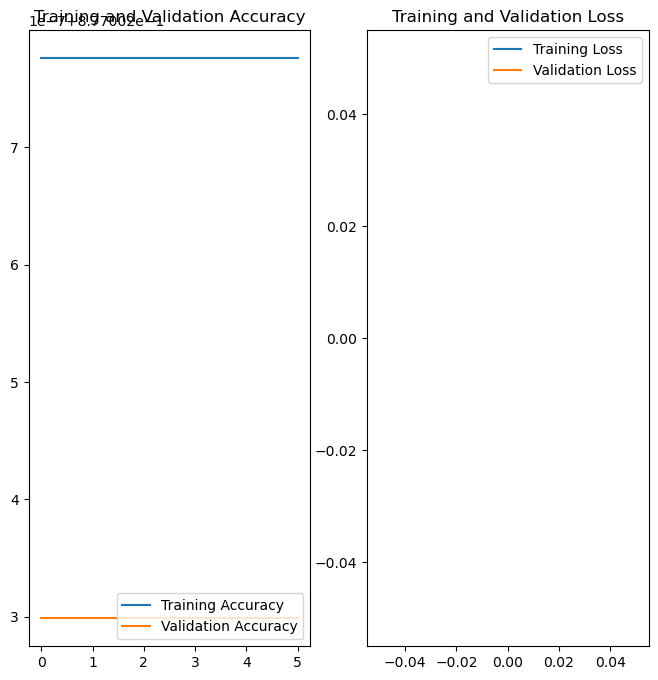

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
X_test = insurance_data_test.iloc[::]

In [43]:
X_test.shape

(7669866, 16)

In [44]:
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
X_test_scaled

array([[-1.08622761, -1.22613164,  0.044532  , ..., -0.7829764 ,
        -1.66162109, -0.73195356],
       [ 0.92061736,  0.57392768,  0.044532  , ...,  0.79090489,
         0.59089251,  1.5046813 ],
       [ 0.92061736,  0.57392768,  0.044532  , ..., -0.67254479,
        -1.66162109, -0.83804544],
       ...,
       [ 0.92061736,  0.57392768,  0.044532  , ..., -0.67254479,
        -1.66162109, -0.72889894],
       [ 0.92061736, -0.55944301,  0.044532  , ..., -0.7829764 ,
         0.59089251,  1.5046813 ],
       [ 0.92061736, -1.02612505,  0.044532  , ..., -0.7829764 ,
        -0.53536429, -0.48885061]])

In [46]:
prediction = model.predict(X_test_scaled)

239684/239684 [==============================] - 388s 2ms/step


In [47]:
prediction

array([[3.3490535e-02],
       [2.9017422e-01],
       [2.2494279e-01],
       ...,
       [2.0514375e-03],
       [5.5435228e-01],
       [3.7062928e-04]], dtype=float32)

In [48]:
submit = pd.read_csv('./kaggle/sample_submission/sample_submission.csv')
submit.Response = prediction
submit[['id', 'Response']].to_csv('./kaggle/working/neural_network.csv', index=False)

In [49]:
submit.head()

,id,Response
0,11504798,0.033491
1,11504799,0.290174
2,11504800,0.224943
3,11504801,0.000383
4,11504802,0.037532


# Applying LightGBM 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.11, random_state=42)

In [51]:
!pip install lightgbm

     ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00


In [40]:
import lightgbm as lgb

In [41]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

In [42]:
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'num_leaves': 64,
    'learning_rate': 0.075,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'max_depth': 10
}

bst = lgb.train(
    params,
    train_data,
    num_boost_round=1308,             # Increased boost rounds
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(50)]
)

[LightGBM] [Info] Number of positive: 1259246, number of negative: 8980024
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.737890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 10239270, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122982 -> initscore=-1.964489
[LightGBM] [Info] Start training from score -1.964489
Training until validation scores don't improve for 20 rounds
[50]	valid_0's auc: 0.863573
[100]	valid_0's auc: 0.867478
[150]	valid_0's auc: 0.869004
[200]	valid_0's auc: 0.869797
[250]	valid_0's auc: 0.870337
[300]	valid_0's auc: 0.870644
[350]	valid_0's auc: 0.870836
[400]	valid_0's auc: 0.871026
[450]	valid_0's auc: 0.871155
[500]	valid_0's auc: 0.871273
[550]	valid_0's auc: 0.871364
[600]	valid_0's auc: 0.871449
[650]	valid_0's auc: 0.87151
[700]	valid_0's auc: 0.871575
[750]	valid_0's auc:

In [43]:
y_pred_prob = bst.predict(X_test, num_iteration=bst.best_iteration)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8717346472398119


In [48]:
y_pred_prob

array([4.25195654e-01, 1.01775058e-01, 2.93796234e-01, ...,
       1.13053897e-04, 5.42336783e-02, 1.95999612e-02])

In [44]:
insurance_data_test.shape

(7669866, 11)

In [45]:
X_test = insurance_data_test.iloc[::]

In [49]:
prediction = bst.predict(X_test)

In [51]:
submit = pd.read_csv('./kaggle/sample_submission/sample_submission.csv')
submit.Response = prediction[::]
submit[['id', 'Response']].to_csv('./kaggle/working/lightgbm.csv', index=False)

In [52]:
submit.head()

,id,Response
0,11504798,0.014172
1,11504799,0.448593
2,11504800,0.193409
3,11504801,0.000229
4,11504802,0.275774


# Applying XGBoost

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

In [34]:
# Try to sacle the training for only neural network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
model = xgb.XGBClassifier(objective = 'binary:logistic', max_depth = 25 , 
                         n_estimators = 500)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8521586642097212


In [25]:
insurance_data_test.shape

(7669866, 9)

In [26]:
insurance_data_test.drop(['id'], axis=1, inplace=True)

In [27]:
X_test = insurance_data_test.iloc[::]

In [36]:
X_test_scaled = scaler.fit_transform(X_test)

In [28]:
prediction = model.predict_proba(X_test)

In [31]:
prediction[:,1]

array([3.1119983e-03, 3.8611579e-01, 2.2129618e-01, ..., 1.6017976e-04,
       5.8728272e-01, 1.5320422e-05], dtype=float32)

In [32]:
submit = pd.read_csv('./kaggle/sample_submission/sample_submission.csv')
submit.Response = prediction[:,1]
submit[['id', 'Response']].to_csv('./kaggle/working/xgboost.csv', index=False)

In [33]:
submit.head()

,id,Response
0,11504798,0.003112
1,11504799,0.386116
2,11504800,0.221296
3,11504801,0.000135
4,11504802,0.040817
